In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00


In [ ]:
import os
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font_scale=1.5, font="SimHei", rc={"axes.unicode_minus":False})

import torch
from ultralytics import YOLO

from PIL import Image

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
config = {
    "path": "/kaggle/input/yolo-drone-detection-dataset/drone_dataset",
    "train": "/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train",
    "val": "/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid",
    "nc": 1,
    "names": ["drone"],
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [ ]:
!pip install wandb

In [ ]:
!wandb disabled

W&B disabled.


In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


 4CB22CG060_Yuvaraj_Aralithaya_D.pdf
'Aadhar card.pdf'
'Answer paper'
 archive
 Certificates
 Classroom
'Colab Notebooks'
 FF7F7706-277D-4C48-BEEA-FF7F5962A7B1.jpeg
'Getting started.pdf'
 IMG-20200227-WA0001.jpg
 IMG-20200227-WA0002.jpg
 IMG-20200227-WA0003.jpg
 IMG-20200227-WA0004.jpg
 IMG-20200227-WA0009.jpg
 IMG-20200227-WA0027.jpg
 IMG-20200227-WA0056.jpg
'Lila Games'
'My works'
'NTM-BME755A-M-2 Notes.pdf'
'offer letter for yuvaraj Aralithaya.pdf'
'profile photo.png'
 Resume
'RPA Module 1(Chap1 and Chap 3).gdoc'
'Send off'
 Snapchat-1788609233-01.jpeg
 TestResults
 train
 valid
'Yuvaraj (Postermania Digital)'
 Yuvaraj_Resume.pdf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/archive'


data.yaml  train  valid


In [ ]:
train_path = '/content/drive/MyDrive/archive/train'
valid_path = '/content/drive/MyDrive/archive/valid'


In [ ]:
!cat /content/drive/MyDrive/archive/data.yaml

names:
- drone
nc: 1

train: D:/Project/Drone Detection/dataset/archive/train/images
val: D:/Project/Drone Detection/dataset/archive/valid/images


In [ ]:
new_yaml = """train: /content/drive/MyDrive/archive/train/images
val: /content/drive/MyDrive/archive/valid/images

nc: 3
names: ['drone', 'bird', 'plane']
"""

with open('/content/drive/MyDrive/archive/data.yaml', 'w') as f:
    f.write(new_yaml)

print("✅ data.yaml file updated successfully!")


✅ data.yaml file updated successfully!


In [ ]:
!cat /content/drive/MyDrive/archive/data.yaml


train: /content/drive/MyDrive/archive/train/images
val: /content/drive/MyDrive/archive/valid/images

nc: 3
names: ['drone', 'bird', 'plane']


In [ ]:
pip install --upgrade ultralytics


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")   # <-- YOLO 11 Medium Model


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')   # <-- switch to YOLO11 Medium model

results = model.train(
    data='/content/drive/MyDrive/archive/data.yaml',
    epochs=200,              # Train more for higher accuracy
    imgsz=640,
    batch=16,                # Good training stability
    workers=4,
    device=0                 # Uses GPU
)


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/archive/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/archive


data.yaml  train  valid


In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -q ultralytics

import torch, sys, os
print("Torch:", torch.__version__, "| CUDA available:", torch.cuda.is_available())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.1 MB/s eta 0:00:00
Torch: 2.8.0+cu126 | CUDA available: True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
BEST = "/content/drive/MyDrive/TestResults/best (yolo11s).pt"


In [ ]:
!find /content/drive/MyDrive -name data.yaml


/content/drive/MyDrive/archive/data.yaml


In [ ]:
DATA = "/content/drive/MyDrive/archive/data.yaml"


In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

model = YOLO(BEST)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
results = model.val(
    data=DATA,
    imgsz=640,
    conf=0.25,   # confidence threshold
    iou=0.6,     # IoU for evaluation
    plots=True   # generates PR curve, confusion matrix, etc.
)


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 2.1±3.7 ms, read: 0.3±0.3 MB/s, size: 308.5 KB)
val: Scanning /content/drive/MyDrive/archive/valid/labels.cache... 347 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 347/347 293.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 0.5it/s 44.9s
                   all        347        369      0.915      0.911      0.943      0.627
                 drone        347        369      0.915      0.911      0.943      0.627
Speed: 1.2ms preprocess, 7.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val


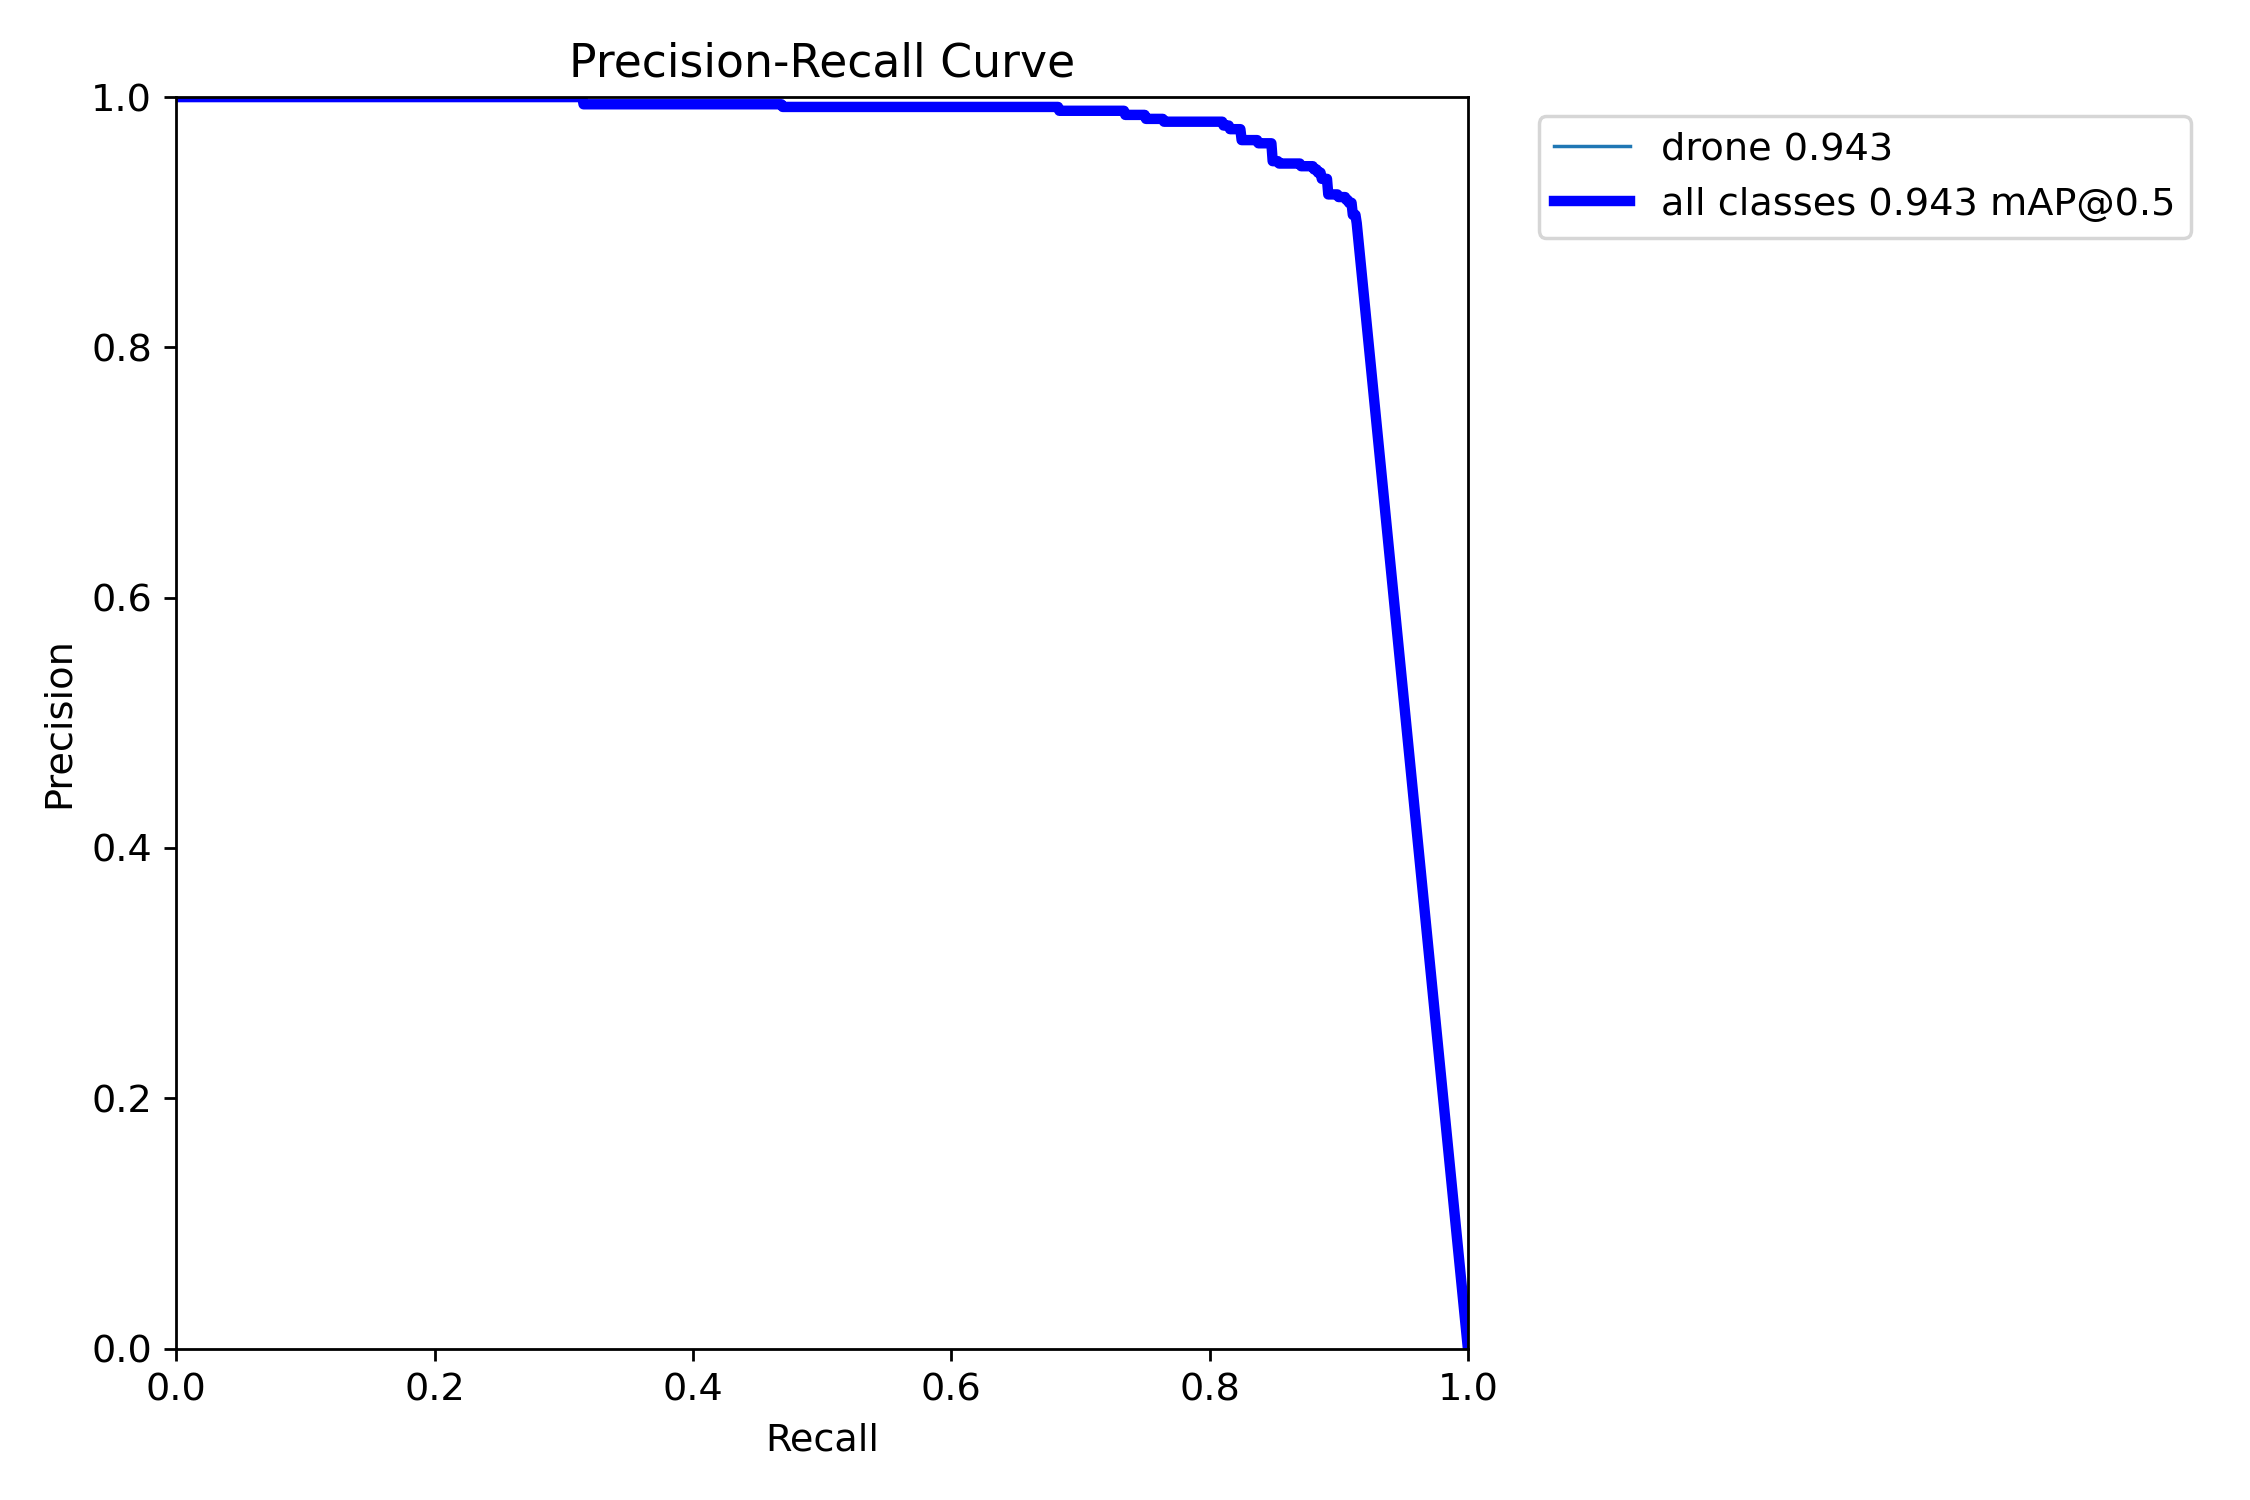

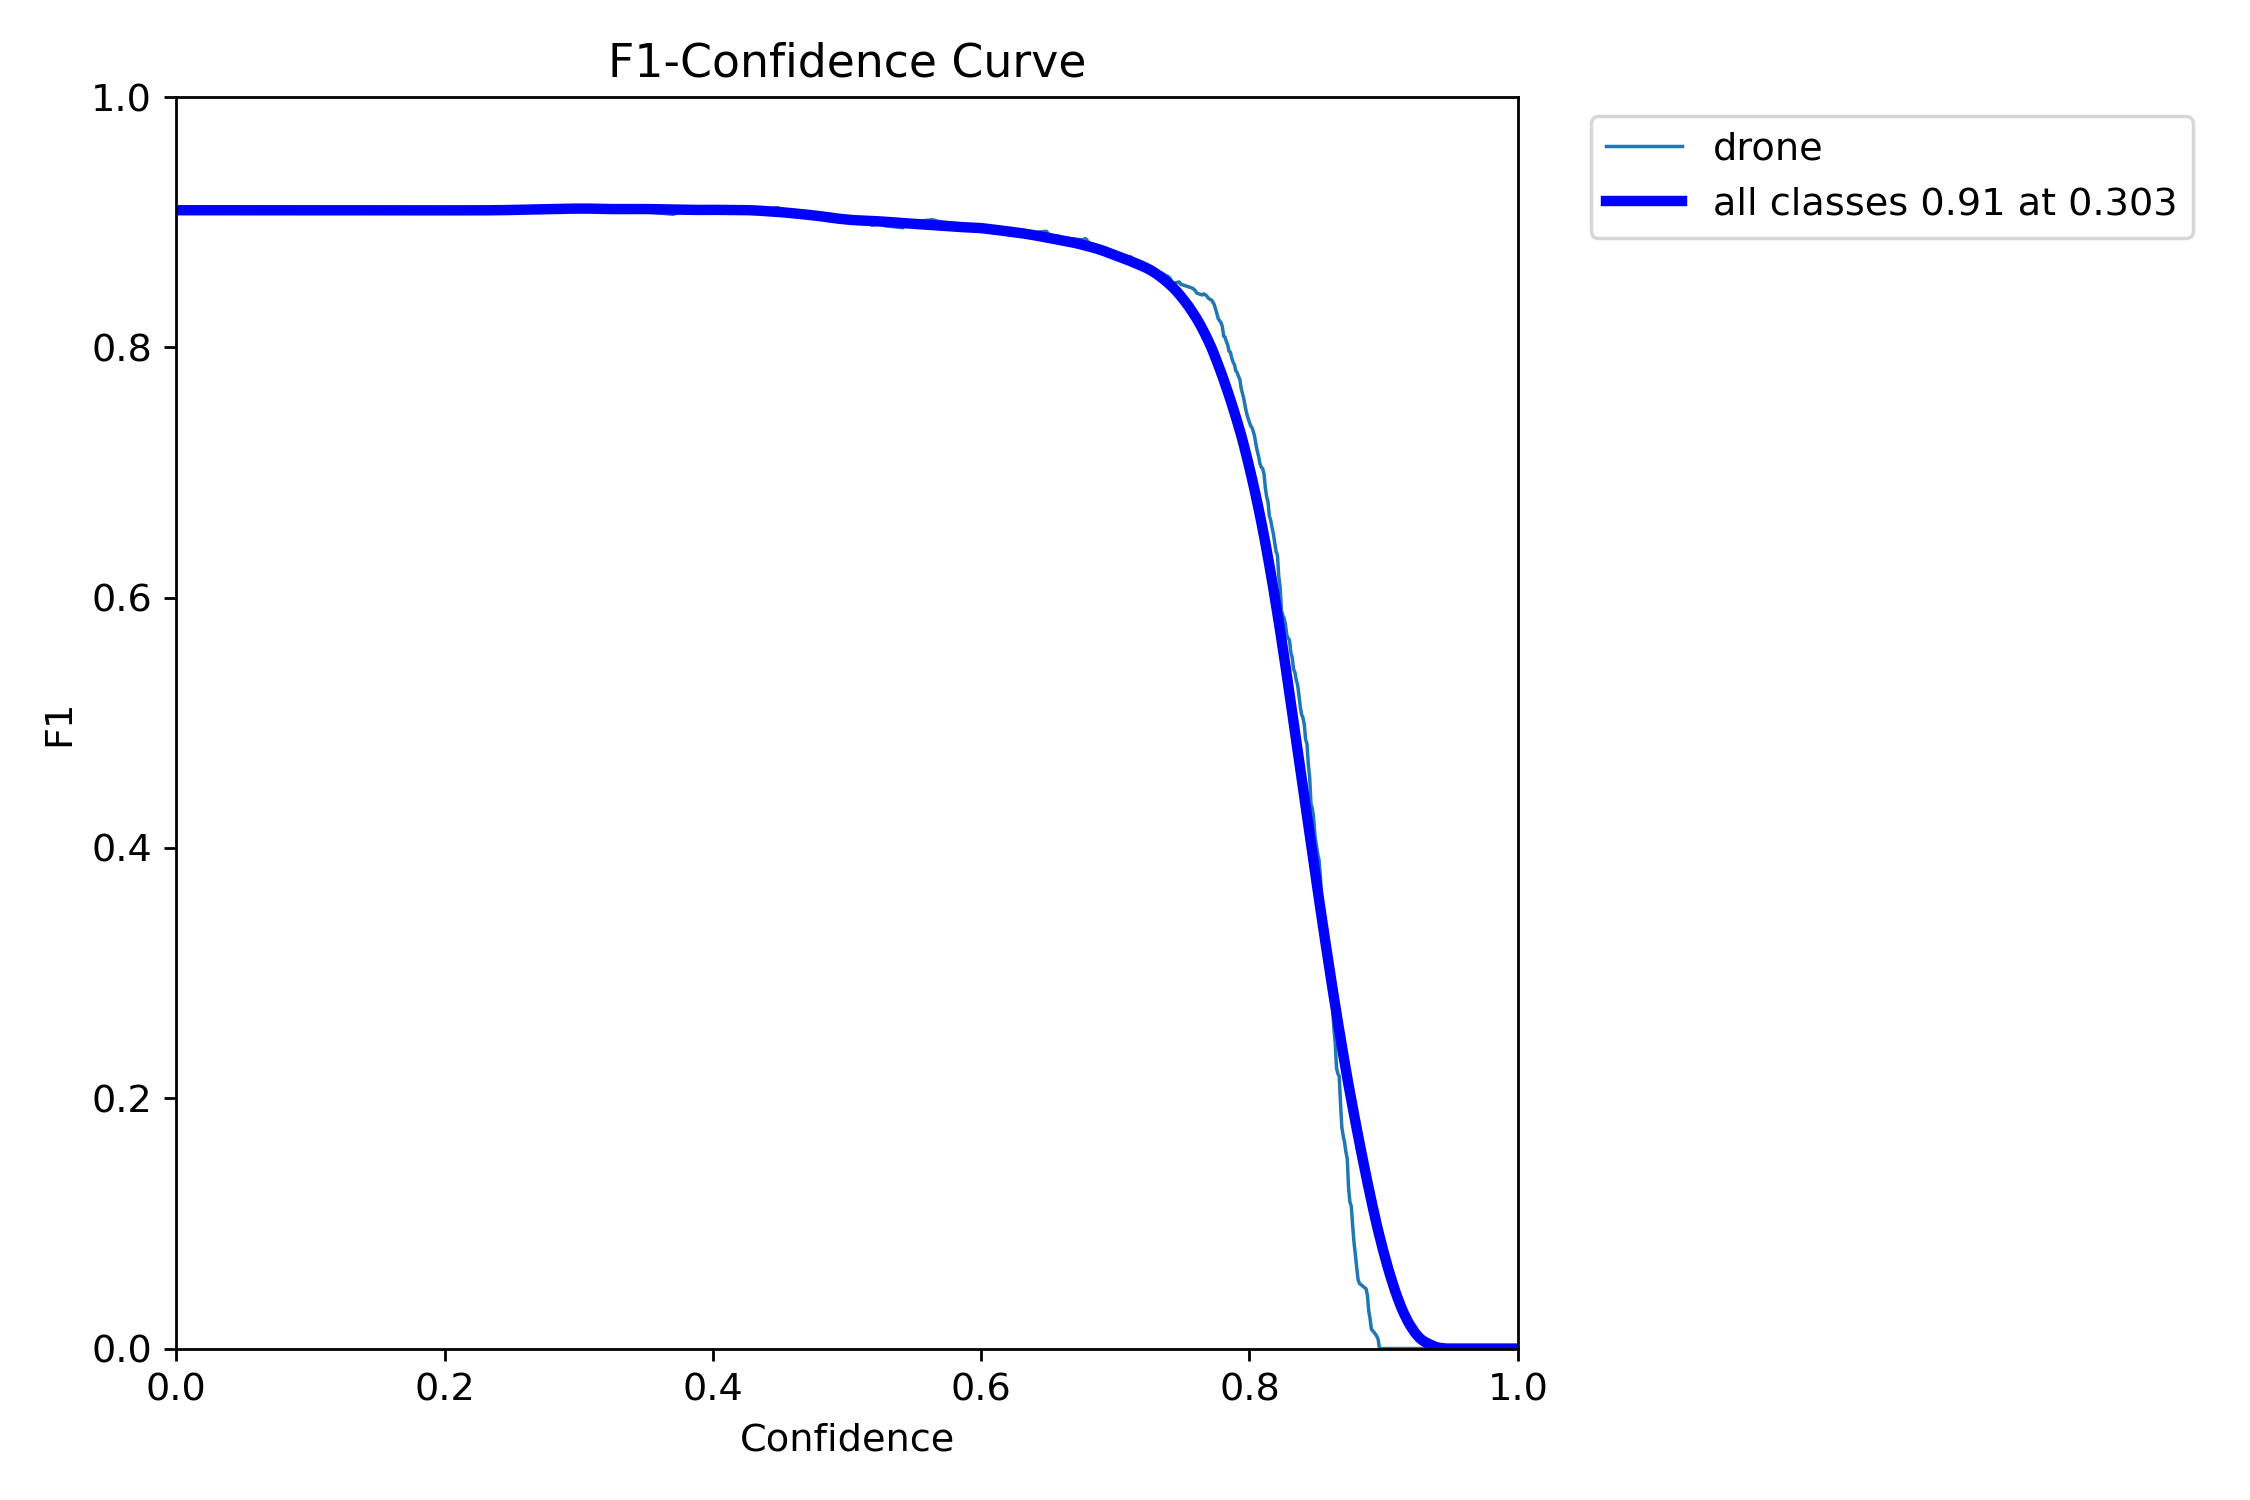

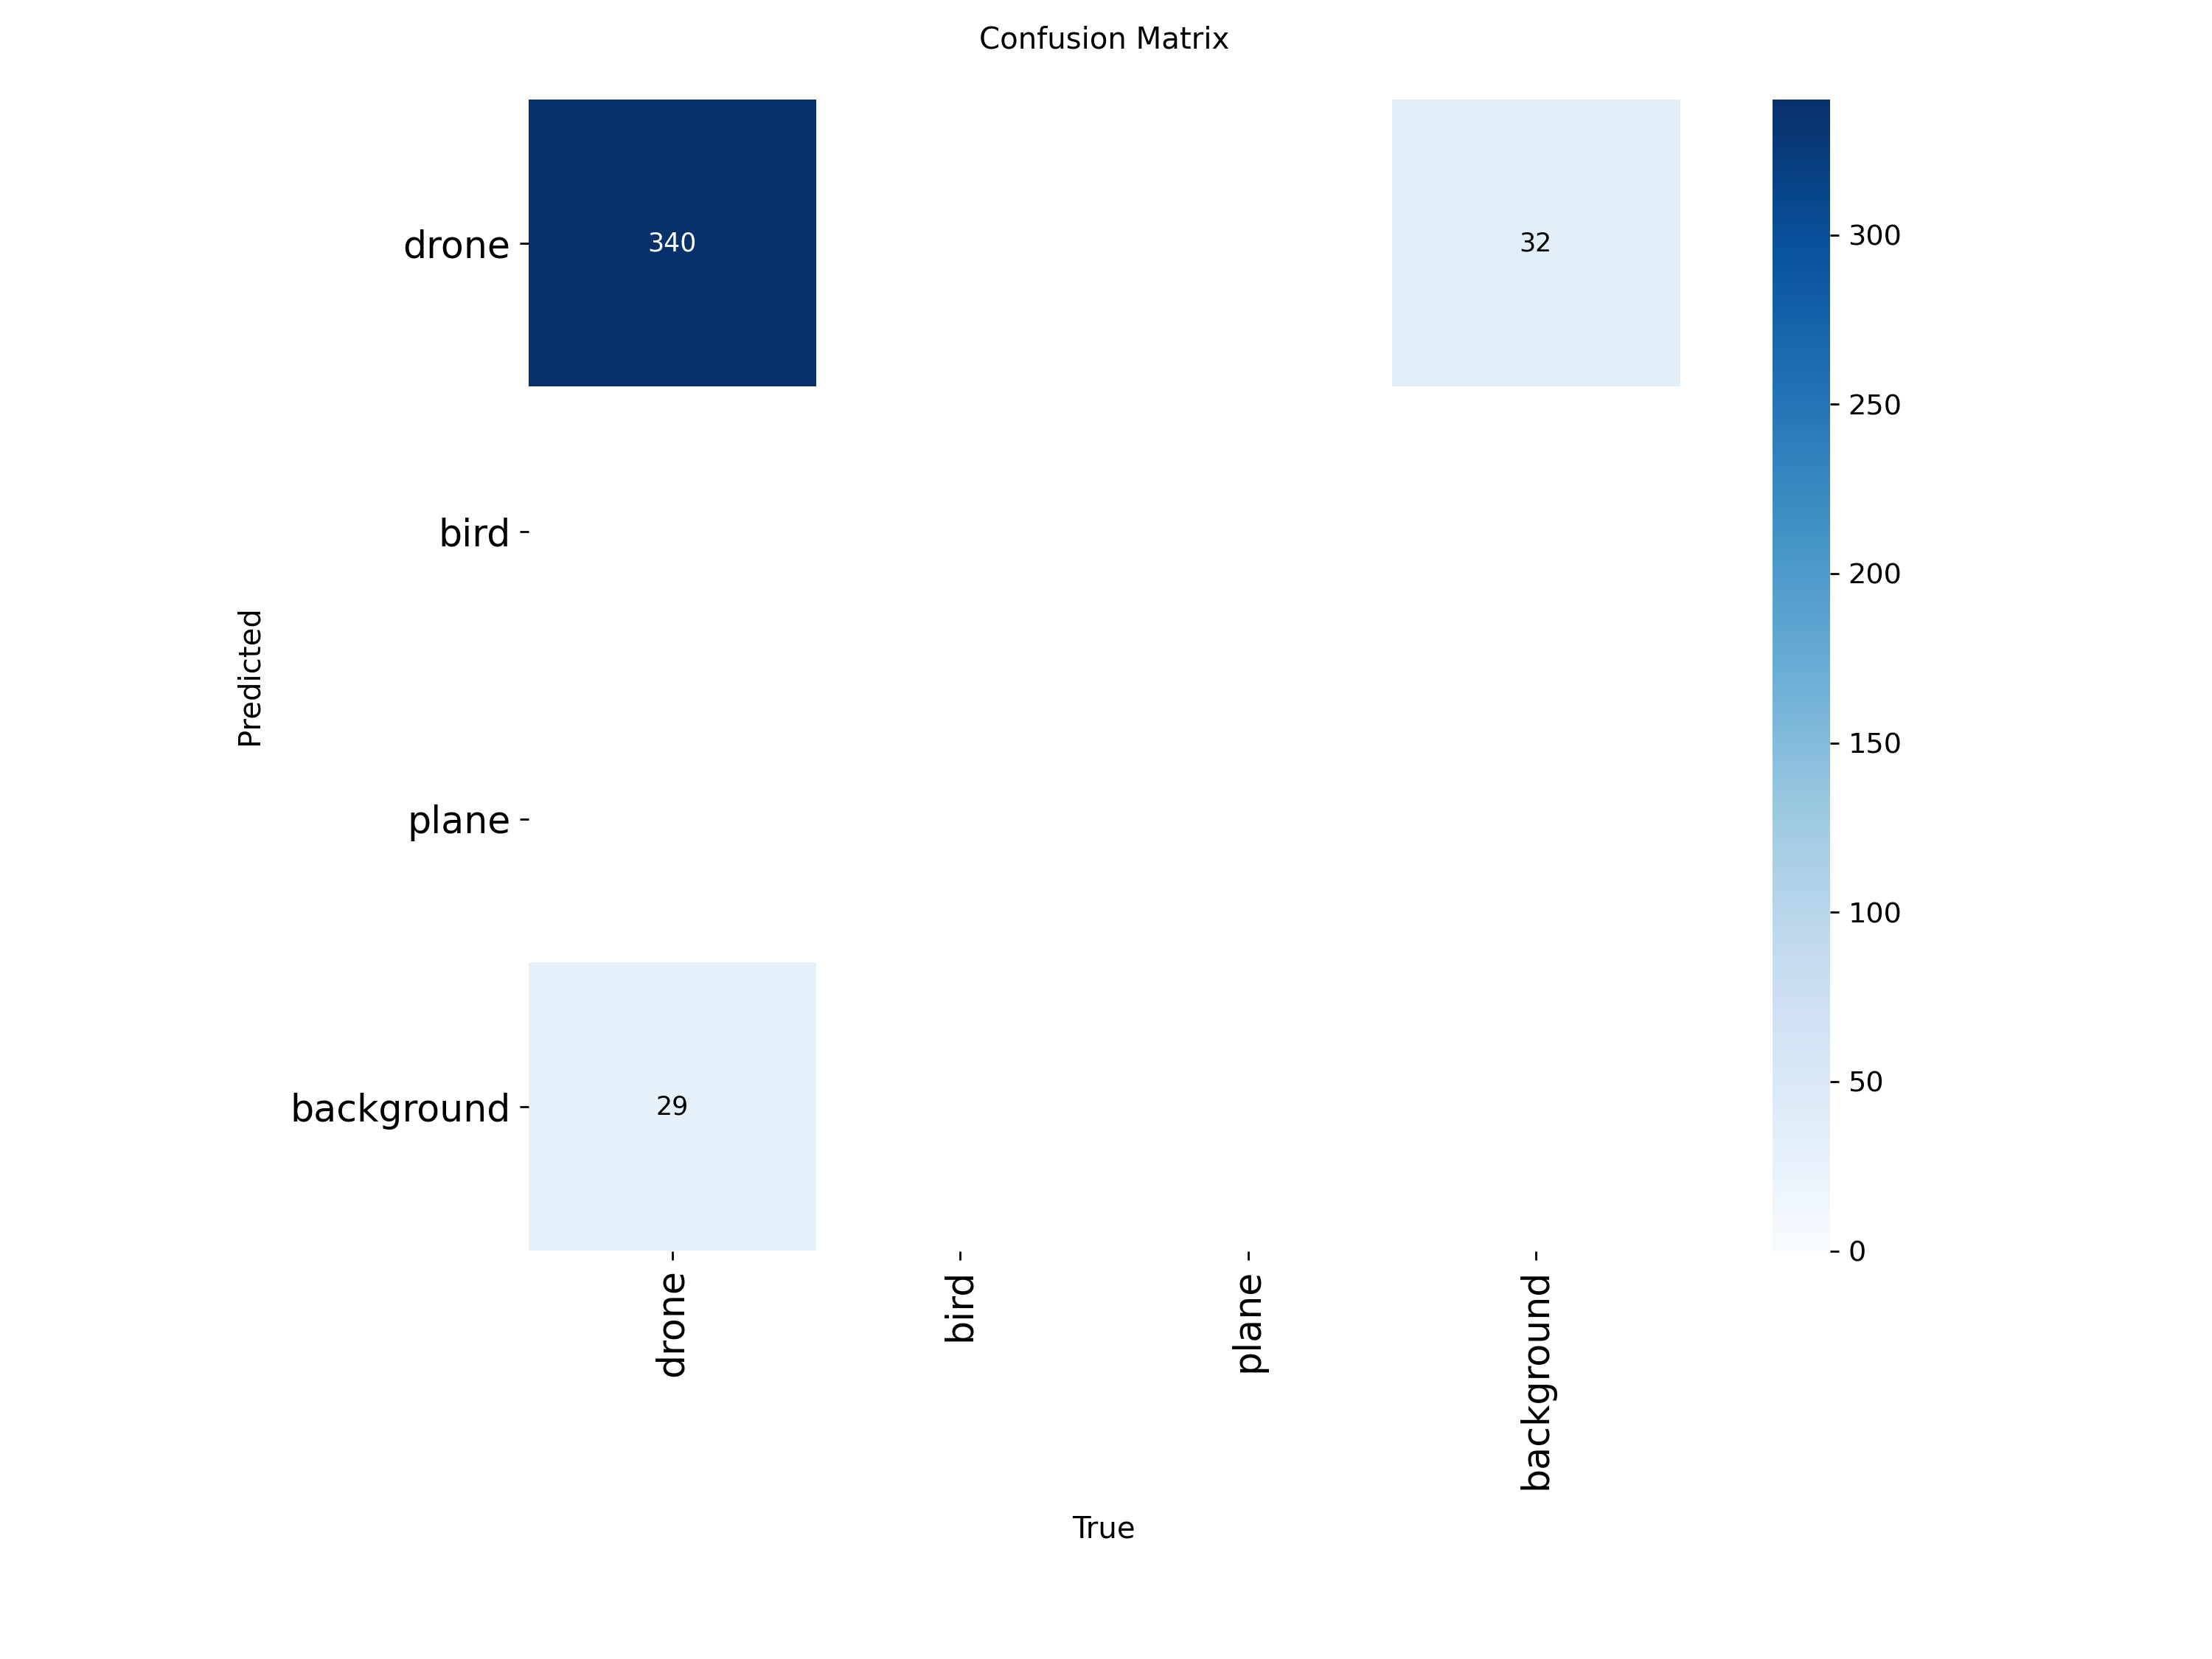

In [ ]:
import glob
from IPython.display import Image, display

val_dir = sorted(glob.glob("runs/detect/val*"))[-1]

display(Image(filename=f"{val_dir}/BoxPR_curve.png", width=800))
display(Image(filename=f"{val_dir}/BoxF1_curve.png", width=800))
display(Image(filename=f"{val_dir}/confusion_matrix.png", width=800))


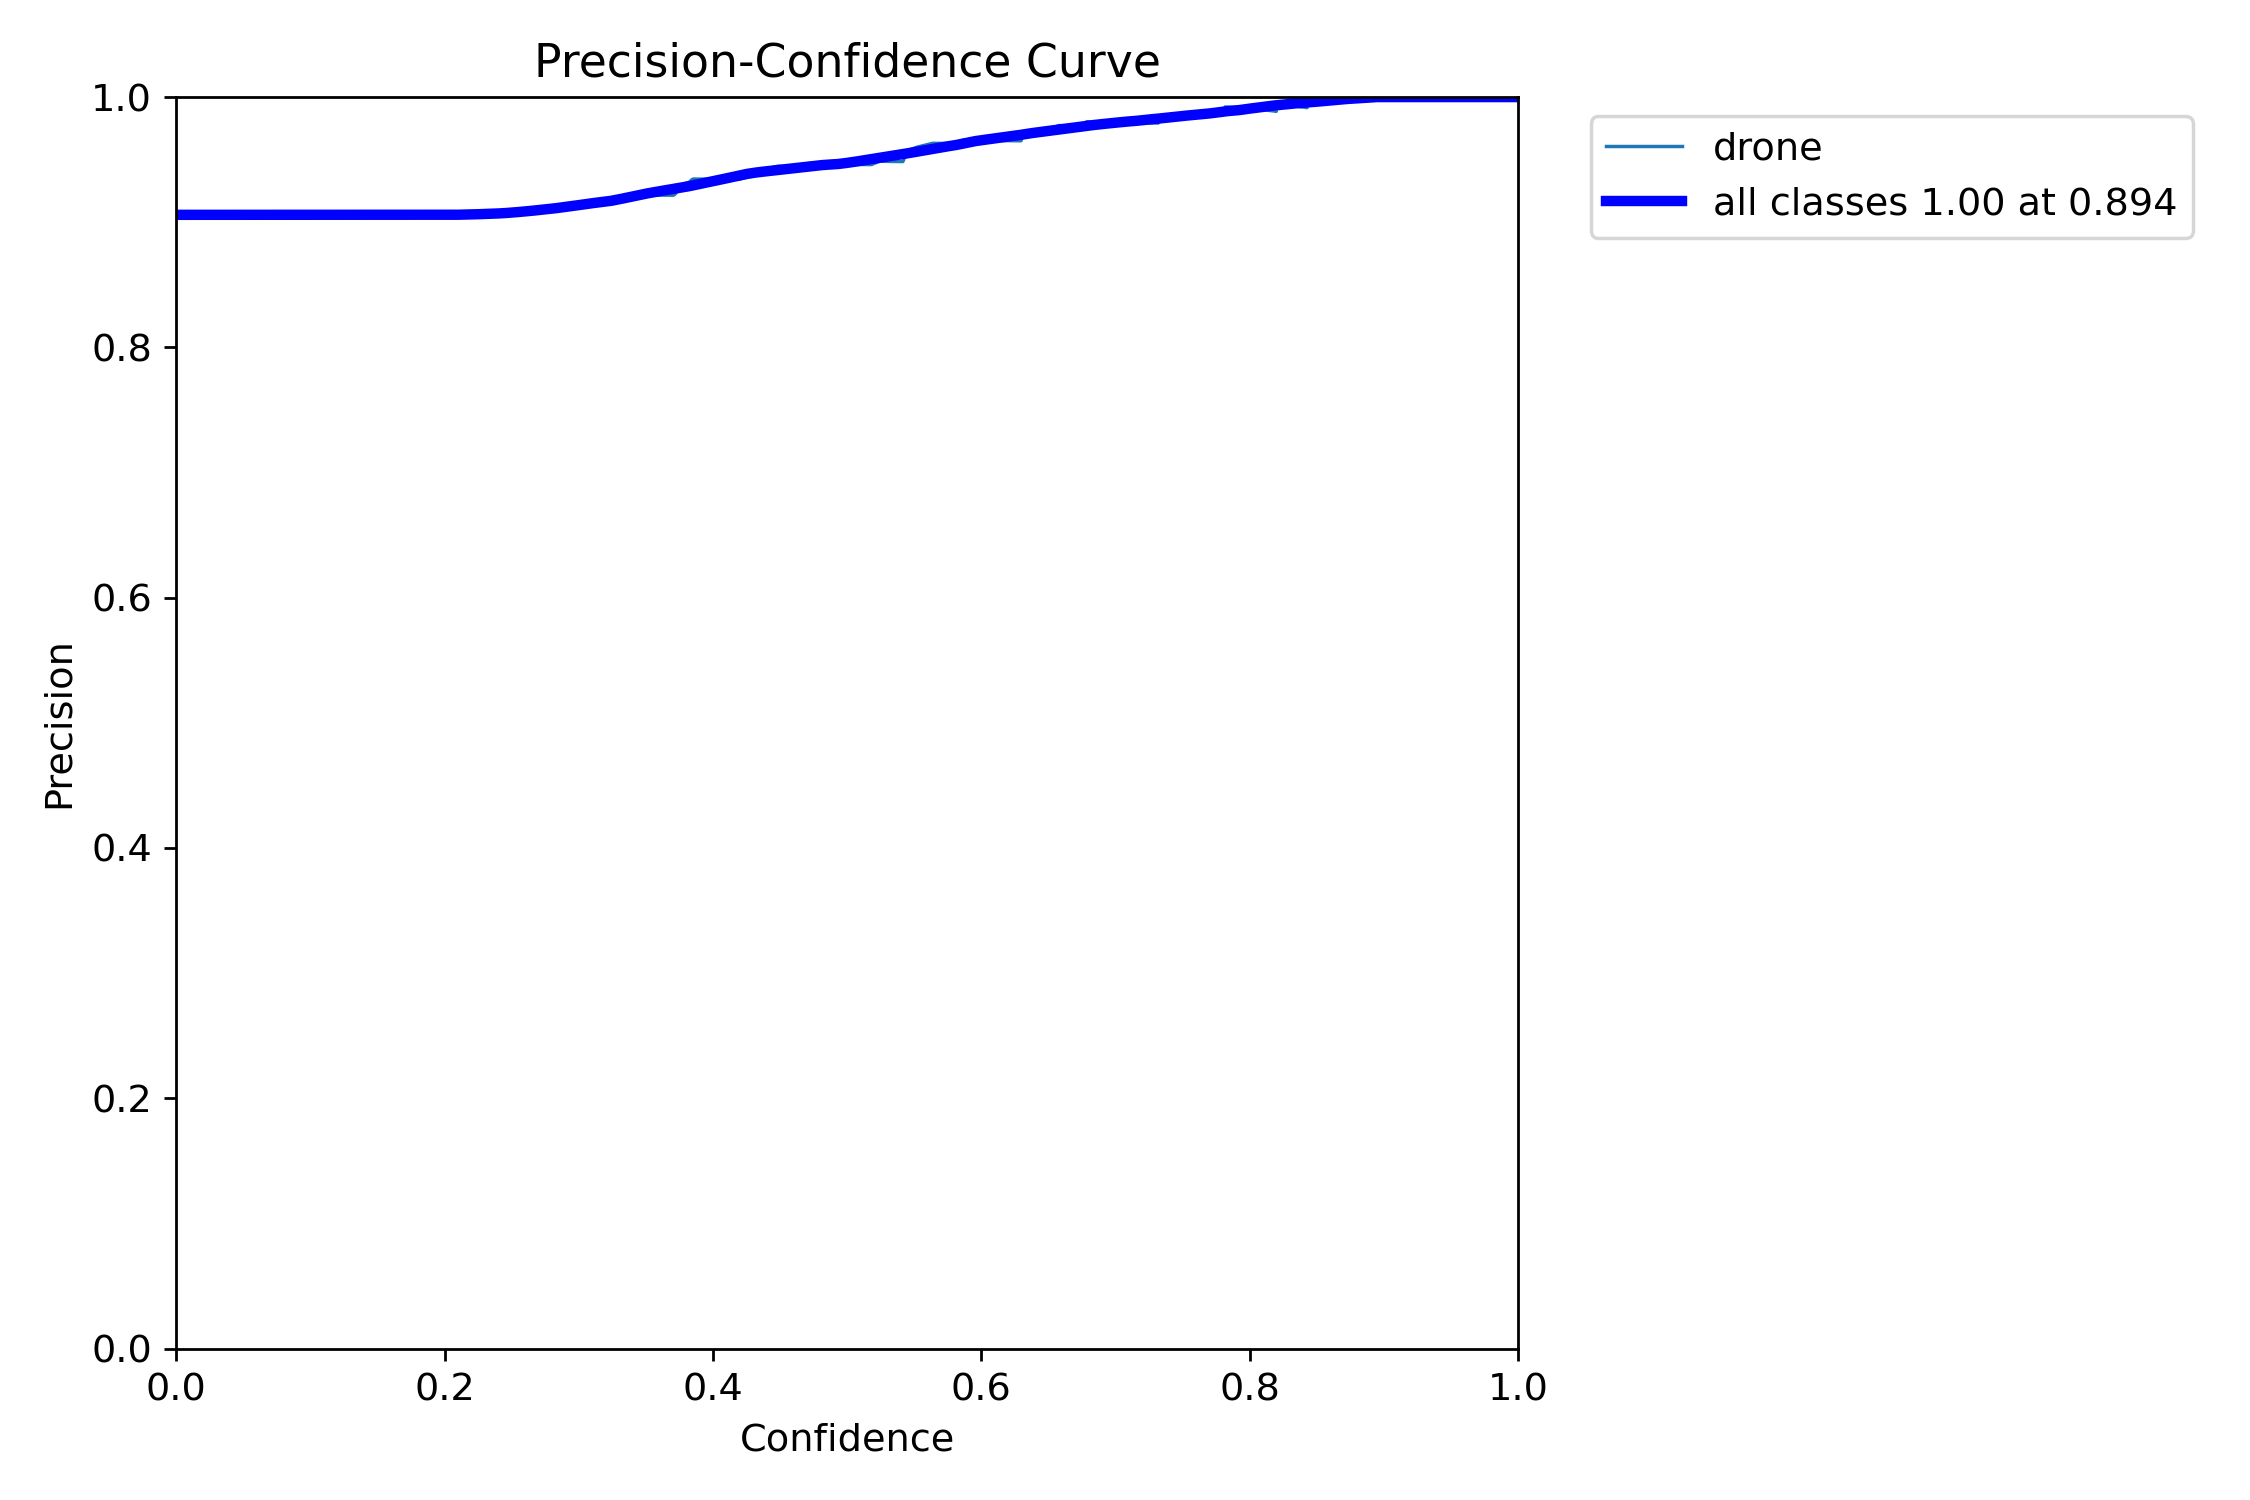

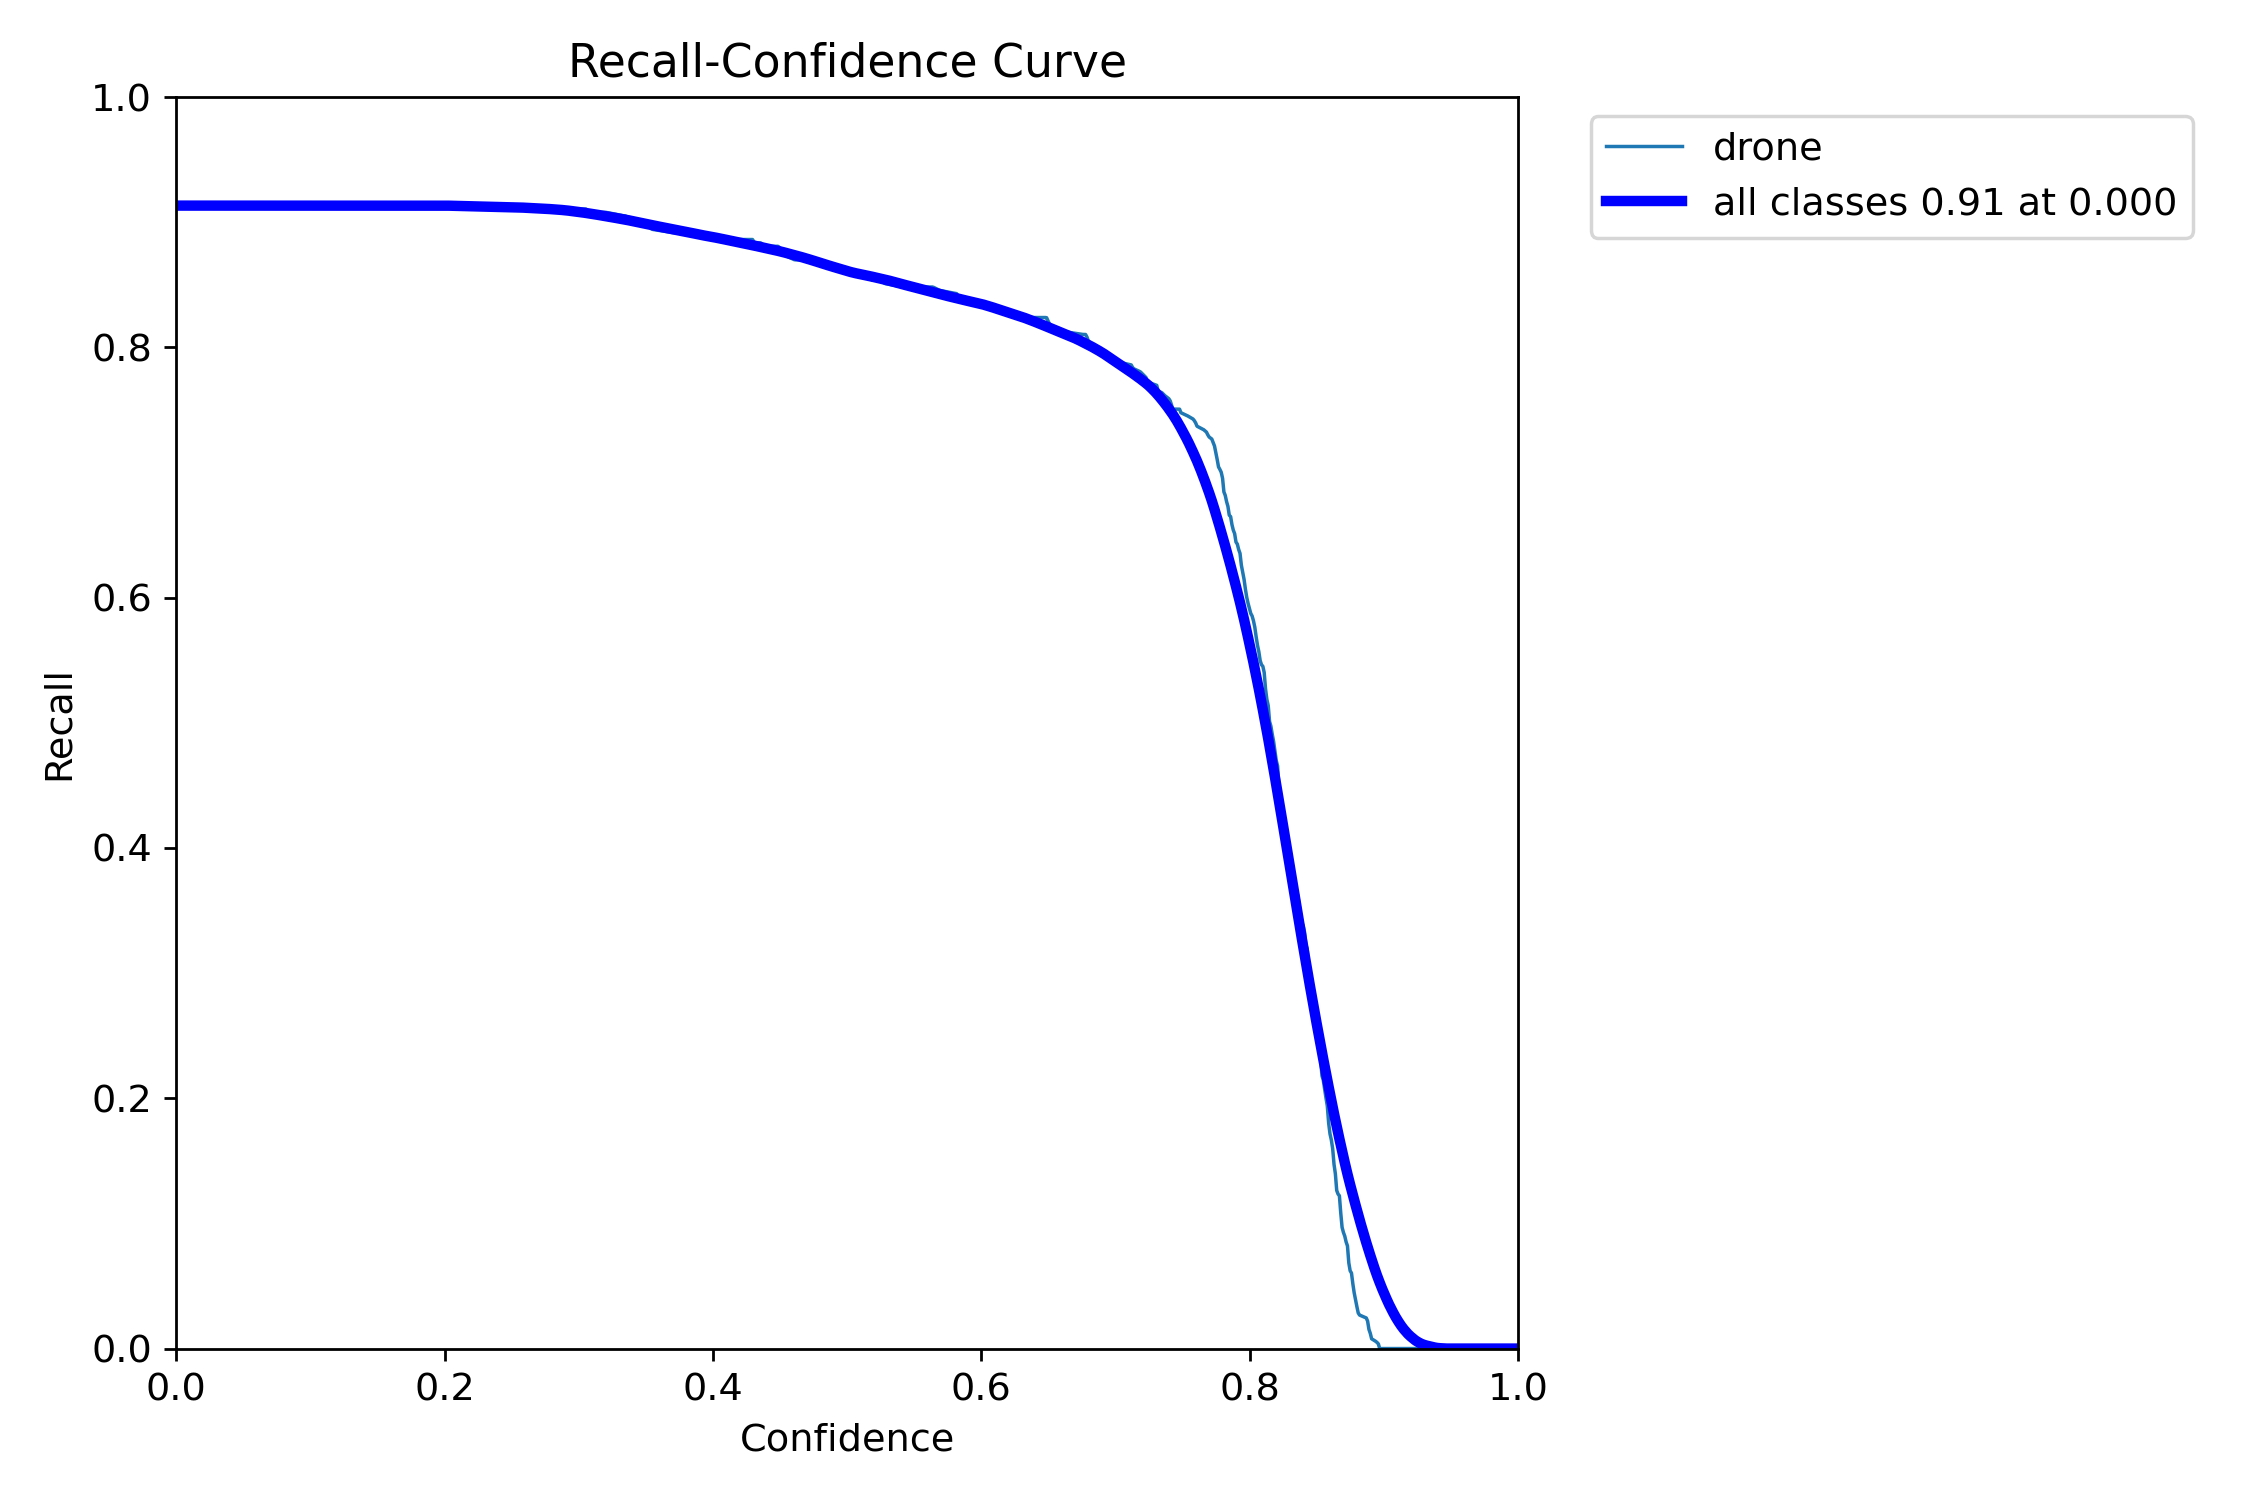

In [ ]:
display(Image(filename=f"{val_dir}/BoxP_curve.png", width=800))
display(Image(filename=f"{val_dir}/BoxR_curve.png", width=800))


In [ ]:
# Convert YOLO11 metrics to percentages

precision = results.results_dict["metrics/precision(B)"] * 100
recall = results.results_dict["metrics/recall(B)"] * 100
map50 = results.results_dict["metrics/mAP50(B)"] * 100
map5095 = results.results_dict["metrics/mAP50-95(B)"] * 100

# F1 Score
f1 = 2 * (precision/100 * recall/100) / ((precision/100) + (recall/100)) * 100

print("📊 Model Performance (Out of 100):\n")
print(f"Precision    : {precision:.2f} / 100")
print(f"Recall       : {recall:.2f} / 100")
print(f"F1 Score     : {f1:.2f} / 100")
print(f"mAP@0.5      : {map50:.2f} / 100")
print(f"mAP@0.5:0.95 : {map5095:.2f} / 100")


📊 Model Performance (Out of 100):

Precision    : 91.51 / 100
Recall       : 91.06 / 100
F1 Score     : 91.28 / 100
mAP@0.5      : 94.26 / 100
mAP@0.5:0.95 : 62.72 / 100
